SURVEY DATA ANALYSIS



Assessment Overview:
* Develop three hypotheses then answer them using a survey data set.
* At least one hypothesis should look explore demographic composition of respondents.
* At least one hypothesis should require data from two or more survey questions to be answered.

Data Preparation

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyreadstat
from scipy.stats import chi2_contingency

Data Source:
* We will be using the Survey data set from 'GSS7218_R3.DTA' file

Data Analysis
 

In [2]:
#create a dataframe based on questions about web usage(Information Society) - Questions only asked in 2000-04
#In the past 12 months, that is, from (INSERT CURRENT MONTH) 1999/2001 through (INSERT CURRENT MONTH) 2000/02 have you
#used the Web to do each of these things:

#invest12: Invest money in a stock or mutual fund?
#work12:   Look for information you needed for your work?
#hmefin12: Home finances or banking?
#people12: Tried to meet new people for social purpose?

## Hypothesis 1:

Males are more likely to use the web for home finances or banking compared to Females.
              

In [3]:
# Reading data and selecting relevant columns

df = pd.read_stata('GSS7218_R3.DTA', columns=['id', 'year','sex', 'age', 'work12', 'hmefin12', 'people12' , 'invest12'])
df

,id,year,sex,age,work12,hmefin12,people12,invest12
0,1,1972,female,23.0,NaN,NaN,NaN,NaN
1,2,1972,male,70.0,NaN,NaN,NaN,NaN
2,3,1972,female,48.0,NaN,NaN,NaN,NaN
3,4,1972,female,27.0,NaN,NaN,NaN,NaN
4,5,1972,female,61.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
64809,2344,2018,female,37.0,NaN,NaN,NaN,NaN
64810,2345,2018,female,75.0,NaN,NaN,NaN,NaN
64811,2346,2018,female,67.0,NaN,NaN,NaN,NaN
64812,2347,2018,male,72.0,NaN,NaN,NaN,NaN


In [4]:
df.dropna(inplace=True)
df.set_index('id', inplace=True)

In [5]:
df.head()

,year,sex,age,work12,hmefin12,people12,invest12
id,,,,,,,
1,2000,male,26.0,yes,no,no,no
9,2000,male,44.0,yes,no,no,no
11,2000,female,53.0,yes,no,no,no
12,2000,male,52.0,yes,yes,no,yes
13,2000,male,52.0,no,no,no,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 1 to 2762
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   year      1649 non-null   int16   
 1   sex       1649 non-null   category
 2   age       1649 non-null   category
 3   work12    1649 non-null   category
 4   hmefin12  1649 non-null   category
 5   people12  1649 non-null   category
 6   invest12  1649 non-null   category
dtypes: category(6), int16(1)
memory usage: 29.0 KB


In [7]:
df.columns

Index(['year', 'sex', 'age', 'work12', 'hmefin12', 'people12', 'invest12'], dtype='object')

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1649.0,2001.194663,0.981168,2000.0,2000.0,2002.0,2002.0,2002.0


In [51]:
# checking for missing value/data
df.isnull()

,yearsincedeath,yearsincedeath2,persondeathemotionallydistressing,depressed,restlessSleep,happy,lonely,sad,yearsincedeathbin
id,,,,,,,,,
16,False,False,False,False,False,False,False,False,False
32,False,False,False,False,False,False,False,False,False
39,False,False,False,False,False,False,False,False,False
79,False,False,False,False,False,False,False,False,False
84,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2809,False,False,False,False,False,False,False,False,False
2819,False,False,False,False,False,False,False,False,False
2829,False,False,False,False,False,False,False,False,True


In [52]:
# checking for duplicate value/data

df.duplicated()

id
16      False
32      False
39      False
79      False
84      False
        ...  
2809    False
2819    False
2829    False
2838    False
2867    False
Length: 264, dtype: bool

In [9]:
df.rename(columns={'work12' :'workinformation', 
                             'hmefin12':'homefinancesbanking',
                             'people12':'meetpeople', 
                             'invest12':'stockinvestment'}, 
                                                
                              
                    inplace=True)
df

,year,sex,age,workinformation,homefinancesbanking,meetpeople,stockinvestment
id,,,,,,,
1,2000,male,26.0,yes,no,no,no
9,2000,male,44.0,yes,no,no,no
11,2000,female,53.0,yes,no,no,no
12,2000,male,52.0,yes,yes,no,yes
13,2000,male,52.0,no,no,no,no
...,...,...,...,...,...,...,...
2755,2002,female,44.0,no,yes,yes,no
2756,2002,female,33.0,yes,no,no,no
2758,2002,male,45.0,yes,yes,yes,no


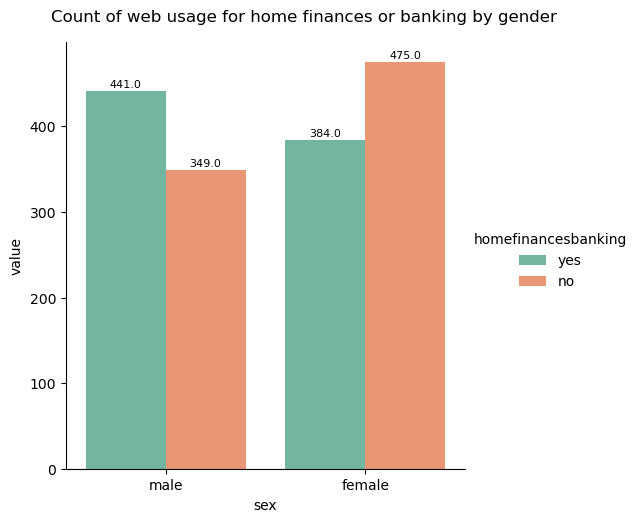

In [10]:
# Creating a contingency table
contingency_table = pd.crosstab(df['sex'], df['homefinancesbanking'])

# Plotting
g = sns.catplot(data=contingency_table.reset_index().melt(id_vars='sex'), x='sex', y='value', hue='homefinancesbanking', kind='bar', palette='Set2')
g.fig.suptitle('Count of web usage for home finances or banking by gender',
               y=1.035)

# Adding counts as labels
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),textcoords='offset points')

# Show the plot
plt.show()

We will compare the proportion of respondents who answered 'yes' to web usage for home finances or banking to those who answered 'no'

homefinancesbanking        yes         no
sex                                      
male                 55.822785  44.177215
female               44.703143  55.296857


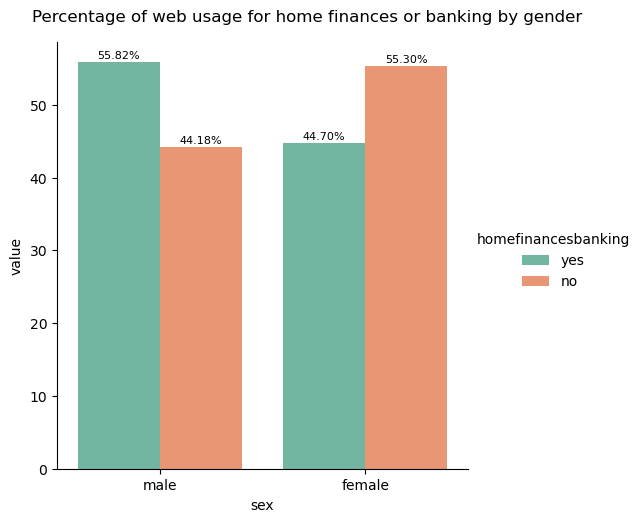

In [11]:
# Calculating proportions and convert to percentages
proportions = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Plotting
g = sns.catplot(data=proportions.reset_index().melt(id_vars='sex'), x='sex', y='value', hue='homefinancesbanking', kind='bar', palette='Set2')
g.fig.suptitle('Percentage of web usage for home finances or banking by gender',
               y=1.035)

# Printing the proportions as percentages
print(proportions)

# Adding percentages as labels
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Show the plot
plt.show()

Conclusion: 

It can be concluded that there is a difference in web usage for home finances or banking between males and females. 

*Among males, approximately 55.82% reported using the web for home finances or banking, while 44.18% reported not using it.

*Among females, approximately 44.70% reported using the web for home finances or banking, while 55.30% reported not using it.

These findings support the hypothesis that "Males are more likely to use the web for home finances or banking compared to Females." This conclusion is drawn from the higher proportion of males (55.82%) using the web for home finances or banking compared to females (44.70%). 

We will run a chi-squared test on the observed frequencies to determine if the results provide a statistically significant association between web usage for homefinance/banking and gender.

In [12]:
ct = pd.crosstab(df['sex'], df['homefinancesbanking'])
ct

homefinancesbanking,yes,no
sex,,
male,441,349
female,384,475


In [13]:
chi2, p, dof, expected = chi2_contingency(ct)

In [14]:
print('Chi-squared', chi2)
print('p-value: ', p)
print('Degrees of freedom: ', dof)

Chi-squared 19.911248641926438
p-value:  8.112161615698314e-06
Degrees of freedom:  1


Based on the Chi-squared test result our p-value is approximately 0.000008

There is a statistically significant association between gender (male or female) and the use of the web for home finances or banking.

Given the very low p-value (p < 0.05),  suggesting that there is a statistically significant difference between males and females regarding their likelihood to use the web for home finances or banking.

Based on this analysis, it appears that males are more likely to use the web for home finances or banking compared to females. This conclusion is drawn from the significant association between gender and web usage for financial purposes observed in the dataset.

It's important to note that while the chi-squared test identifies a significant association, it does not provide information about the direction or magnitude of the association. In this case, it indicates that there is a difference between males and females but does not quantify the extent of that difference. Further analysis or exploration may be necessary to understand the nature of this difference more deeply.







 ## Hypothesis 2: 
 
 There is a correlation between age and web usage for investing in stocks or mutual funds.

In [15]:
# Convert age to numeric, replacing '89+ age' with 89, this is to ensures that the 'age' column is properly formatted and contains consistent numeric values, 
# facilitating subsequent data analysis tasks.

df['age'] = df['age'].astype(str).replace('89+ age', '89').astype(float)


C:\Users\afolu\AppData\Local\Temp\ipykernel_20680\2710711492.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


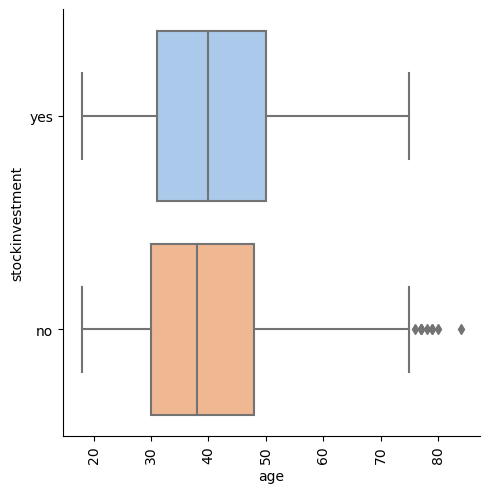

In [16]:
# Create the catplot to visualize the year distribution 
g = sns.catplot(data=df, x='age', y='stockinvestment', kind='box', palette='pastel')

# Rotate x-axis labels
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [17]:
df['age'].value_counts()

43.0    58
37.0    57
32.0    53
39.0    51
46.0    51
        ..
80.0     1
78.0     1
84.0     1
74.0     1
76.0     1
Name: age, Length: 64, dtype: int64

Next, we binned Age into ‘18 to 30' and '31 to 90’ years. This step is necessary because ‘age’  is a continuous variable and analyzing it as such may result in complex or difficult-to-interpret results. Binning age into discrete categories simplifies the analysis and makes it easier to understand patterns or trends across age groups.


Text(0.5, 1.035, 'Count of Web usage for  Investing in Stock or Mutual Fund by Age.')

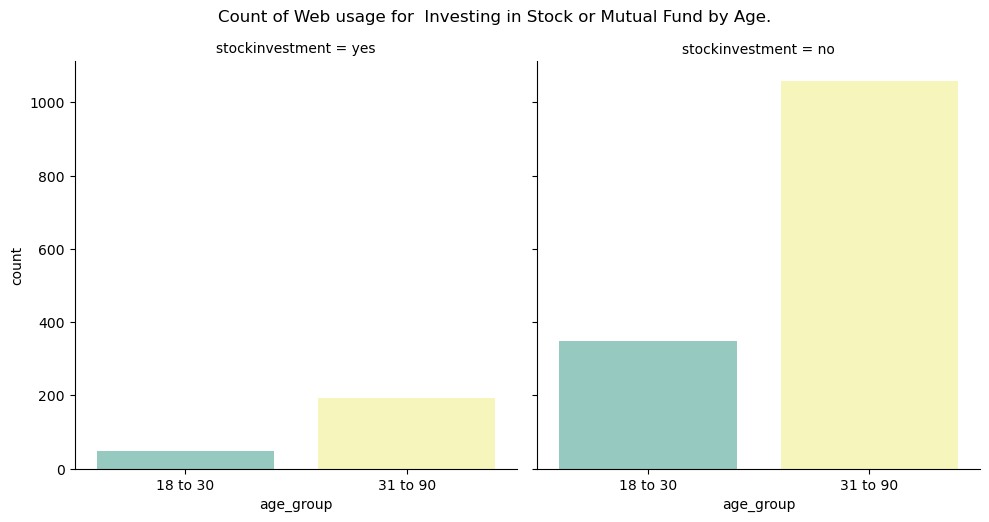

In [18]:
# Define the bins for age ranges
bins = [18, 30, 90]

# Define the labels for the age ranges
labels = ['18 to 30', '31 to 90']

# Create a new column 'age_group' by cutting the 'age' column into the specified bins and labels
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

#print(df)
g = sns.catplot(data=df, x='age_group', col='stockinvestment', kind= 'count', palette='Set3')
g.fig.suptitle('Count of Web usage for  Investing in Stock or Mutual Fund by Age.',y=1.035)

We will compare the proportion of respondents who answered 'yes' to web usage for investment in stock or mutual fund to those who answered 'no'

In [19]:
# Convert age to numeric, replacing '89+ age' with 89, this is to ensures that the 'age' column is properly formatted and contains consistent numeric values, 
# facilitating subsequent data analysis tasks.

df['age'] = df['age'].astype(str).replace('89+ age', '89').astype(float)
df

,year,sex,age,workinformation,homefinancesbanking,meetpeople,stockinvestment,age_group
id,,,,,,,,
1,2000,male,26.0,yes,no,no,no,18 to 30
9,2000,male,44.0,yes,no,no,no,31 to 90
11,2000,female,53.0,yes,no,no,no,31 to 90
12,2000,male,52.0,yes,yes,no,yes,31 to 90
13,2000,male,52.0,no,no,no,no,31 to 90
...,...,...,...,...,...,...,...,...
2755,2002,female,44.0,no,yes,yes,no,31 to 90
2756,2002,female,33.0,yes,no,no,no,31 to 90
2758,2002,male,45.0,yes,yes,yes,no,31 to 90


In [20]:
# Descriptive Summary
df.describe()


,year,age
count,1649.000000,1649.000000
mean,2001.194663,40.030321
std,0.981168,13.091224
min,2000.000000,18.000000
25%,2000.000000,30.000000
50%,2002.000000,39.000000
75%,2002.000000,48.000000
max,2002.000000,84.000000


stockinvestment         no        yes
age_group                            
18 to 30         87.688442  12.311558
31 to 90         84.652278  15.347722


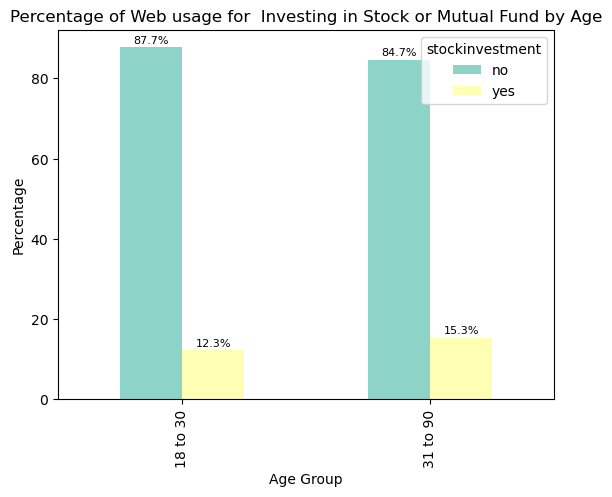

In [21]:
# Calculating the percentage proportions
percentage_df = df.groupby('age_group')['stockinvestment'].value_counts(normalize=True).unstack() * 100

# Printing the proportions as percentages
print(percentage_df)

# Plotting the percentages
ax = percentage_df.plot(kind='bar', color=sns.color_palette('Set3'))

# Adding percentage labels on the bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Setting labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Web usage for  Investing in Stock or Mutual Fund by Age')

# Show plot
plt.show()

There is a difference in web usage for investment behavior between the age groups. 

* Among individuals aged 18 to 30, approximately 12.31% reported using the web for investing in a stock or mutual fund, while about 87.69% did not invest.
* Among individuals aged 31 to 90, approximately 15.35% reported using the web for investing in a stock or mutual fund, while about 84.65% did not 
invest.

Considering the hypothesis "Age is correlated with using the web for Investment in a stock or mutual fund," we observe a higher proportion of individuals aged 31 to 90 who reported investing compared to those aged 18 to 30. This suggests a potential correlation between age and investment behavior, where older individuals (aged 31 to 90) are more likely to use the web to search for information about investing in stocks or mutual funds compared to younger individuals (aged 18 to 30).

We will run a chi-squared test on the observed frequencies to determine if the results provide a statistically significant association between Investment behaviour and these age groups.

In [22]:
ct = pd.crosstab(df['age_group'], df['stockinvestment'])
ct

stockinvestment,yes,no
age_group,,
18 to 30,49,349
31 to 90,192,1059


In [23]:
chi2, p, dof, expected = chi2_contingency(ct)

In [24]:
print('Chi-squared', chi2)
print('p-value: ', p)
print('Degrees of freedom: ', dof)

Chi-squared 1.9937788205122118
p-value:  0.15794633066235184
Degrees of freedom:  1


Based on the result of the chi-squared test conducted to analyze further the relationship between age groups and the use of web for investment in a stock or mutual fund. With a p-value of 0.158, which exceeds the conventional significance level of 0.05. Therefore, there is insufficient evidence to conclude that there is a significant association statistically between age and the use of web for  investment behavior in stocks or mutual funds.

Our sample saw inconsistency in the size of the  respondents in the age group 18 to 30 compared to 31-90.Further research, data collection and analysis may be needed to explore this relationship in more detail.

# Hypothesis 3: 

There is no correlation between loneliness and the time elapsed since the death of a loved one.

* At least one hypothesis should require data from two or more survey questions to be answered

In [25]:
#create a dataframe based on questions about suicide - Questions only asked in 2016
#SUIYRS1:  How many year  has it been since that person's death?
#SUIYRS2: How many months and years has it been since that person's death?
#SUINEG1: Was that person's death emotionally distressing to you?

df_suicide = pd.read_stata('GSS7218_R3.DTA', 
                            columns=['id','suiyrs1','suiyrs2','suineg1'])

In [26]:
#create a dataframe based on questions about mental health indicators

#I will now read out a list of the ways you might have felt or behaved during the past week. 
#Using this card, please tell me how much of the time during the past week...

#cesd1 ...you felt depressed?
#cesd2 ..your sleep was restless?
#cesd3 ...you were happy
#cesd4 ...you felt lonely?
#cesd5 ...you felt sad?

df_mentalhealth = pd.read_stata('GSS7218_R3.DTA', 
                             columns=['id','cesd1','cesd2','cesd3','cesd4','cesd5'])

In [27]:
df_suicide

,id,suiyrs1,suiyrs2,suineg1
0,1,NaN,NaN,NaN
1,2,NaN,NaN,NaN
2,3,NaN,NaN,NaN
3,4,NaN,NaN,NaN
4,5,NaN,NaN,NaN
...,...,...,...,...
64809,2344,NaN,NaN,NaN
64810,2345,NaN,NaN,NaN
64811,2346,NaN,NaN,NaN
64812,2347,NaN,NaN,NaN


In [28]:
df_mentalhealth

,id,cesd1,cesd2,cesd3,cesd4,cesd5
0,1,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
64809,2344,NaN,NaN,NaN,NaN,NaN
64810,2345,NaN,NaN,NaN,NaN,NaN
64811,2346,NaN,NaN,NaN,NaN,NaN
64812,2347,NaN,NaN,NaN,NaN,NaN


In [29]:
df_suicide.dropna(inplace=True)
df_suicide.set_index('id', inplace=True)

In [30]:
df_mentalhealth.dropna(inplace=True)
df_mentalhealth.set_index('id', inplace=True)

In [31]:
df = df_suicide.join(df_mentalhealth, how='inner').dropna()
df.head()

,suiyrs1,suiyrs2,suineg1,cesd1,cesd2,cesd3,cesd4,cesd5
id,,,,,,,,
16,5.0,22.0,"yes, greatly",some of the time,most of the time,some of the time,some of the time,some of the time
32,2.0,50.0,"yes, to some extent",none or almost none of the time,none or almost none of the time,most of the time,none or almost none of the time,none or almost none of the time
39,20.0,25.0,no,none or almost none of the time,none or almost none of the time,all or almost all of the time,some of the time,none or almost none of the time
79,6.0,15.0,"yes, but not much",none or almost none of the time,none or almost none of the time,all or almost all of the time,none or almost none of the time,none or almost none of the time
84,6.0,20.0,"yes, greatly",none or almost none of the time,some of the time,most of the time,none or almost none of the time,some of the time


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 16 to 2867
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   suiyrs1  264 non-null    category
 1   suiyrs2  264 non-null    category
 2   suineg1  264 non-null    category
 3   cesd1    264 non-null    category
 4   cesd2    264 non-null    category
 5   cesd3    264 non-null    category
 6   cesd4    264 non-null    category
 7   cesd5    264 non-null    category
dtypes: category(8)
memory usage: 9.2 KB


In [54]:
# checking for missing data/value

df.isnull()

,yearsincedeath,yearsincedeath2,persondeathemotionallydistressing,depressed,restlessSleep,happy,lonely,sad,yearsincedeathbin
id,,,,,,,,,
16,False,False,False,False,False,False,False,False,False
32,False,False,False,False,False,False,False,False,False
39,False,False,False,False,False,False,False,False,False
79,False,False,False,False,False,False,False,False,False
84,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2809,False,False,False,False,False,False,False,False,False
2819,False,False,False,False,False,False,False,False,False
2829,False,False,False,False,False,False,False,False,True


In [56]:
# checking for duplicate value/data

df.duplicated()

id
16      False
32      False
39      False
79      False
84      False
        ...  
2809    False
2819    False
2829    False
2838    False
2867    False
Length: 264, dtype: bool

In [33]:
df.rename(columns={'suiyrs1':'yearsincedeath', 
                             'suiyrs2':'yearsincedeath2',
                             'suineg1':'persondeathemotionallydistressing', 
                             'cesd1':'depressed', 
                             'cesd2':'restlessSleep', 
                             'cesd3':'happy', 
                             'cesd4':'lonely', 
                             'cesd5':'sad'}, 
                    inplace=True)
df.head()

,yearsincedeath,yearsincedeath2,persondeathemotionallydistressing,depressed,restlessSleep,happy,lonely,sad
id,,,,,,,,
16,5.0,22.0,"yes, greatly",some of the time,most of the time,some of the time,some of the time,some of the time
32,2.0,50.0,"yes, to some extent",none or almost none of the time,none or almost none of the time,most of the time,none or almost none of the time,none or almost none of the time
39,20.0,25.0,no,none or almost none of the time,none or almost none of the time,all or almost all of the time,some of the time,none or almost none of the time
79,6.0,15.0,"yes, but not much",none or almost none of the time,none or almost none of the time,all or almost all of the time,none or almost none of the time,none or almost none of the time
84,6.0,20.0,"yes, greatly",none or almost none of the time,some of the time,most of the time,none or almost none of the time,some of the time


In [34]:
df.yearsincedeath.value_counts()

10.0    24
0.0     19
2.0     19
1.0     18
5.0     17
20.0    17
6.0     14
15.0    11
7.0     10
8.0     10
4.0     10
3.0     10
30.0    10
12.0     8
45.0     5
35.0     4
16.0     4
17.0     4
27.0     3
40.0     3
36.0     3
11.0     3
9.0      3
25.0     3
47.0     2
50.0     2
60.0     2
23.0     2
18.0     2
14.0     2
41.0     2
52.0     1
49.0     1
55.0     1
48.0     1
56.0     1
46.0     1
43.0     1
67.0     1
28.0     1
37.0     1
34.0     1
33.0     1
29.0     1
24.0     1
21.0     1
19.0     1
13.0     1
75.0     1
32.0     0
26.0     0
51.0     0
53.0     0
22.0     0
59.0     0
70.0     0
Name: yearsincedeath, dtype: int64

In [35]:
#This converts the values in the 'yearsincedeath' column to integer format.
df['yearsincedeath'] = df['yearsincedeath'].astype(int)
df['yearsincedeath2'] = df['yearsincedeath2'].astype(int)


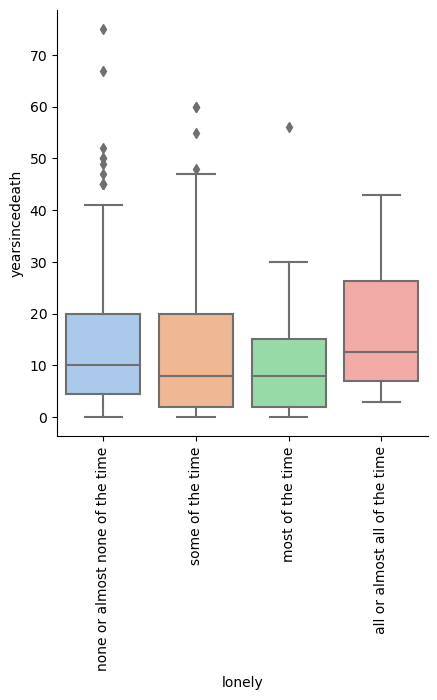

In [36]:
# Create the catplot to visualize the year distribution 
g = sns.catplot(data=df, x='lonely', y='yearsincedeath', kind='box', palette='pastel')

# Rotate x-axis labels
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [37]:
# Create bins
bins = [0, 10, 20, 30, 40, 50, 60, 70]

# Create labels for the bins
labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70']

# Use pd.cut() to bin the 'yearsincedeath' column
df['yearsincedeathbin'] = pd.cut(df['yearsincedeath'], bins=bins, labels=labels, right=False)

# Display the DataFrame with the new 'yearsincedeath_bin' column
print(df)

      yearsincedeath  yearsincedeath2 persondeathemotionallydistressing  \
id                                                                        
16                 5               22                      yes, greatly   
32                 2               50               yes, to some extent   
39                20               25                                no   
79                 6               15                 yes, but not much   
84                 6               20                      yes, greatly   
...              ...              ...                               ...   
2809               1                4                 yes, but not much   
2819               3                7               yes, to some extent   
2829              75               25                 yes, but not much   
2838              20               10               yes, to some extent   
2867               4                7                                no   

                        

In [38]:
df[['yearsincedeathbin','lonely']].value_counts(sort=False)

yearsincedeathbin  lonely                         
1-10               none or almost none of the time    72
                   some of the time                   46
                   most of the time                   10
                   all or almost all of the time       2
11-20              none or almost none of the time    36
                   some of the time                   15
                   most of the time                    7
                   all or almost all of the time       2
21-30              none or almost none of the time    20
                   some of the time                    8
                   most of the time                    1
31-40              none or almost none of the time    12
                   some of the time                    6
                   most of the time                    1
                   all or almost all of the time       1
41-50              none or almost none of the time    10
                   some of the time  

In [39]:
df_pivot = pd.pivot_table(data=df, index='lonely', columns='yearsincedeathbin', aggfunc='size')
df_pivot_normalized = df_pivot.div(df_pivot.sum(axis=1), axis=0)
df_pivot_normalized.head()



yearsincedeathbin,1-10,11-20,21-30,31-40,41-50,51-60,61-70
lonely,,,,,,,
none or almost none of the time,0.467532,0.233766,0.129870,0.077922,0.064935,0.019481,0.006494
some of the time,0.554217,0.180723,0.096386,0.072289,0.060241,0.012048,0.024096
most of the time,0.500000,0.350000,0.050000,0.050000,0.000000,0.050000,0.000000
all or almost all of the time,0.333333,0.333333,0.000000,0.166667,0.166667,0.000000,0.000000


We will use Heatmap to visualize relationships between our variables and  display the strength of their association.

[Text(0.5, 23.52222222222222, ''),
 Text(50.7222222222222, 0.5, 'Level of loneliness')]

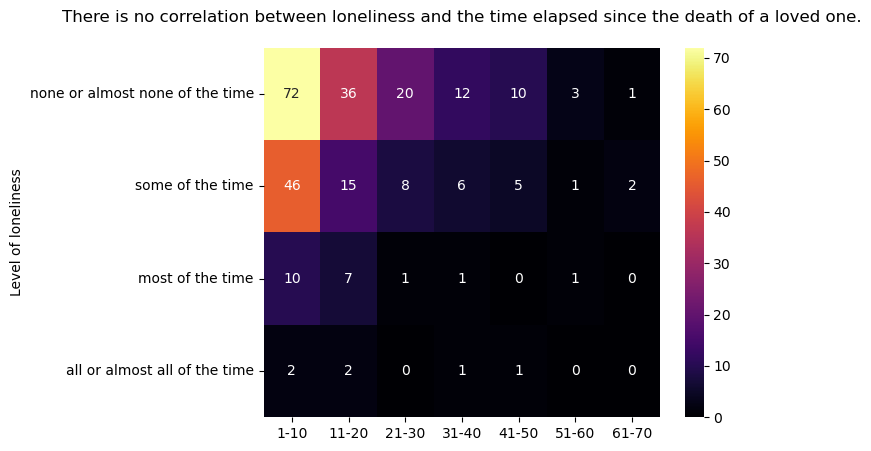

In [40]:
ax = sns.heatmap(df_pivot, cmap='inferno', annot=True, fmt='.3g')
ax.set_title(
    'There is no correlation between loneliness and the time elapsed since the death of a loved one.\n')
ax.set(xlabel='', ylabel='Level of loneliness')

The heatmap may be skewed due to the limited number of respondents for "all or almost all of the time ". Therefore, it is essential to examine the proportion of individuals reporting loneliness and the level of loneliness  compare to those of the overall population

In [41]:
# Creating the  pivot table

df_pivot= df.pivot_table(columns='lonely', index='yearsincedeathbin', aggfunc='size')


 We will calculate proportions relative to the total sum of all values in the DataFrame.

In [42]:

# computes the total sum of all values in the df_pivot DataFrame.
# Next we divide each value in the df_pivot DataFrame by the total sum calculated.
# Multiplying by 100 (* 100)  to convert the proportions to percentages. 

df_proportion = (df_pivot / df_pivot.sum().sum()) * 100


In [43]:
df_proportion

lonely,none or almost none of the time,some of the time,most of the time,all or almost all of the time
yearsincedeathbin,,,,
1-10,27.376426,17.490494,3.802281,0.760456
11-20,13.688213,5.703422,2.661597,0.760456
21-30,7.604563,3.041825,0.380228,0.000000
31-40,4.562738,2.281369,0.380228,0.380228
41-50,3.802281,1.901141,0.000000,0.380228
51-60,1.140684,0.380228,0.380228,0.000000
61-70,0.380228,0.760456,0.000000,0.000000


[Text(0.5, 23.52222222222222, 'year since death'),
 Text(50.722222222222214, 0.5, 'loneliness level')]

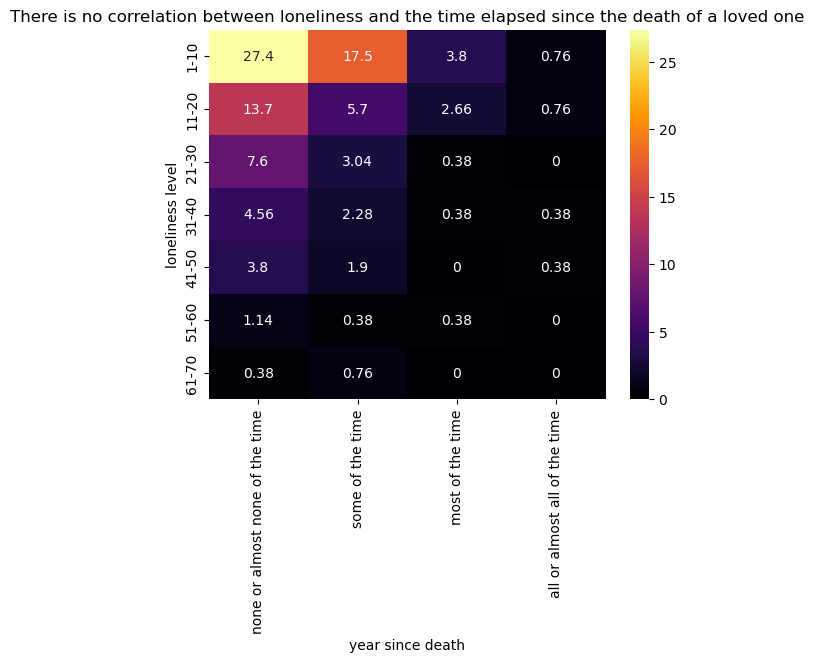

In [44]:
# 

ax = sns.heatmap(df_proportion, cmap='inferno', annot=True, fmt='.3g')
ax.set_title('There is no correlation between loneliness and the time elapsed since the death of a loved one')
ax.set(xlabel='year since death', ylabel='loneliness level')


We will also calculate proportions relative to the sum of values within each column of the DataFrame.

In [45]:
# Multiplying by 100 (* 100)  to convert the proportions to percentages. 

df_proportion_pc = (df_pivot / df_pivot.sum(axis=0)) * 100

In [46]:
df_proportion_pc

lonely,none or almost none of the time,some of the time,most of the time,all or almost all of the time
yearsincedeathbin,,,,
1-10,46.753247,55.421687,50.0,33.333333
11-20,23.376623,18.072289,35.0,33.333333
21-30,12.987013,9.638554,5.0,0.000000
31-40,7.792208,7.228916,5.0,16.666667
41-50,6.493506,6.024096,0.0,16.666667
51-60,1.948052,1.204819,5.0,0.000000
61-70,0.649351,2.409639,0.0,0.000000


[Text(0.5, 23.52222222222222, 'year since death'),
 Text(50.722222222222214, 0.5, 'loneliness level')]

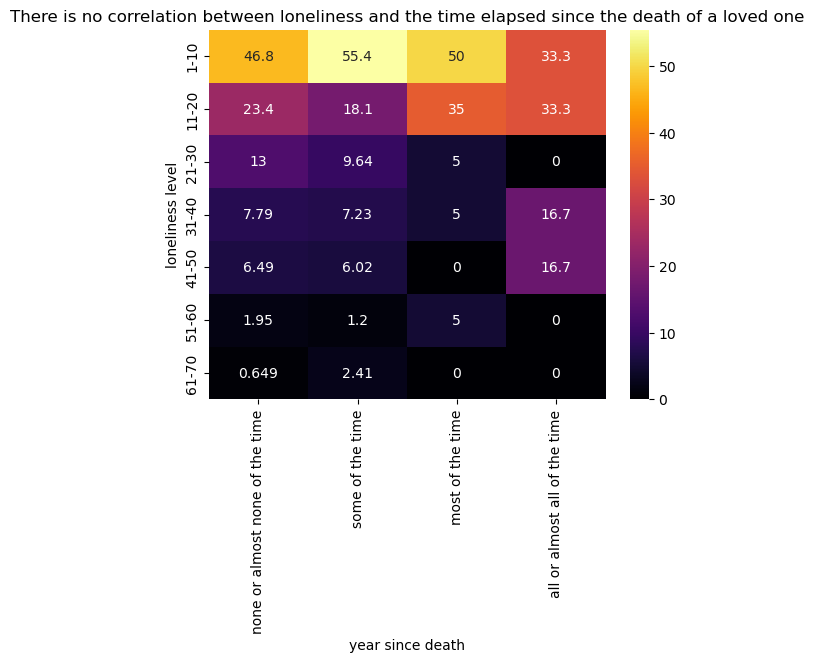

In [47]:
ax = sns.heatmap(df_proportion_pc, cmap='inferno', annot=True, fmt='.3g')
ax.set_title('There is no correlation between loneliness and the time elapsed since the death of a loved one')
ax.set(xlabel='year since death', ylabel='loneliness level')


We  run a chi-squared test on the observed frequencies to determine if the results provide a statistically significant association between loneliness and the year since death groups.

In [48]:
ct = pd.crosstab(df['yearsincedeathbin'], df['lonely'])
ct

lonely,none or almost none of the time,some of the time,most of the time,all or almost all of the time
yearsincedeathbin,,,,
1-10,72,46,10,2
11-20,36,15,7,2
21-30,20,8,1,0
31-40,12,6,1,1
41-50,10,5,0,1
51-60,3,1,1,0
61-70,1,2,0,0


In [49]:
chi2, p, dof, expected = chi2_contingency(ct)
print('Chi-squared', chi2)
print('p-value: ', p)
print('Degrees of freedom: ', dof)

Chi-squared 11.921394674717796
p-value:  0.8512690992159476
Degrees of freedom:  18


Conclusion: Our analysis did not find a statistically significant relationship between the number of years since the death of a loved one and feelings of loneliness. The p-value obtained from our chi-squared test exceeded the typical significance threshold of 0.05, indicating insufficient evidence.

One notable observation is that respondents reported feeling lonely most or all of the time primarily within the 1 - 10 and 11 - 20 year groups. Within our sample, individuals in these year groups reported experiencing loneliness at a proportionally higher rate compared to other groups.

To gain a deeper understanding of the relationship between the time elapsed since the death of a loved one and feelings of loneliness, further data collection and analysis are warranted. Additional research efforts can provide more insights into this complex relationship.





